# Import Libraries

In [1]:
!pip install pyro-ppl


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyro
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pyro.distributions as distrib
import warnings

warnings.filterwarnings('ignore')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
x = pyro.sample("my_sample", pyro.distributions.Normal(loc=0.5, scale=1))
print(x)

tensor(-0.4282)




Normal(loc: 0.5, scale: 1.0)
[-0.40132802724838257, -0.7509164810180664, 0.28963160514831543, 1.7709741592407227, -0.010849356651306152, 0.061666637659072876, 1.5815314054489136, 0.6119204163551331, 0.7873579263687134, 0.9102097153663635]


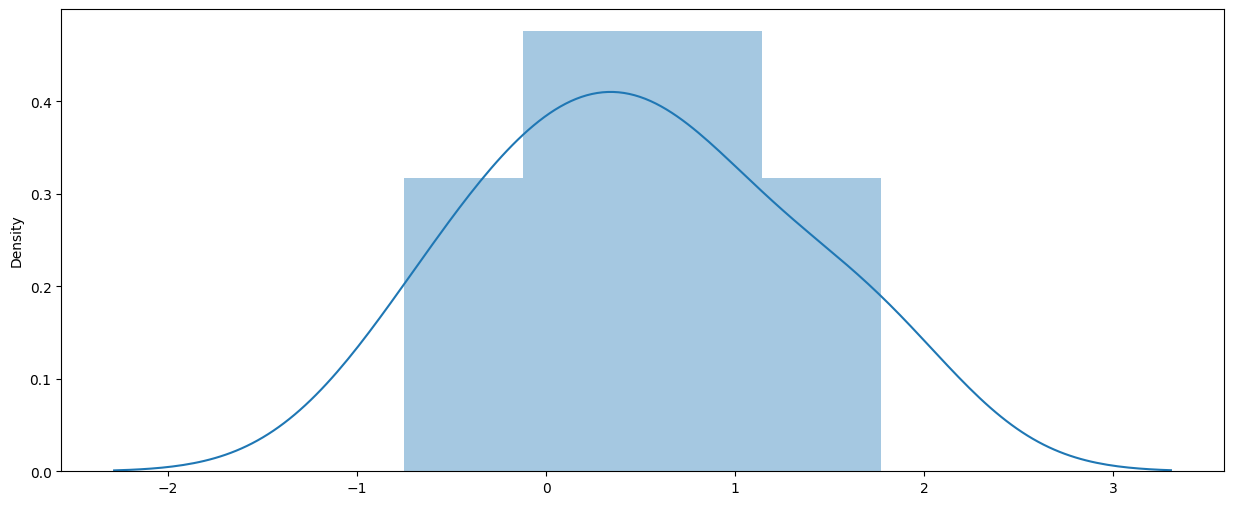



Laplace(loc: 0.8999999761581421, scale: 0.10000000149011612)
[0.8683567643165588, 0.6409585475921631, 1.3498948812484741, 0.8806884288787842, 0.8267635107040405, 0.7212251424789429, 0.8936994671821594, 1.2389150857925415, 0.949454665184021, 0.8966872692108154]


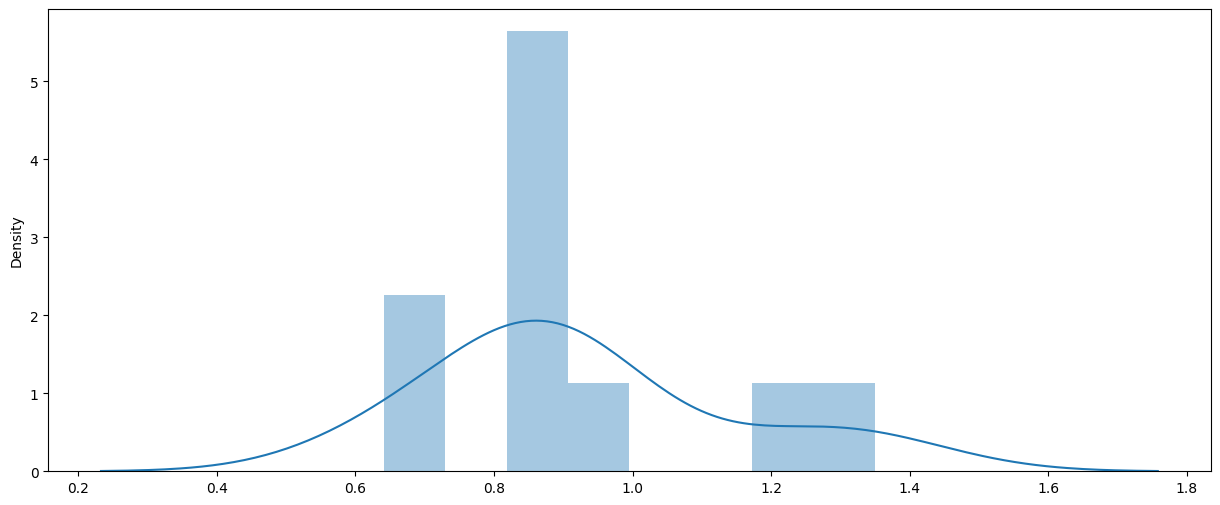



Binomial(total_count: 1.0, probs: 0.30000001192092896)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


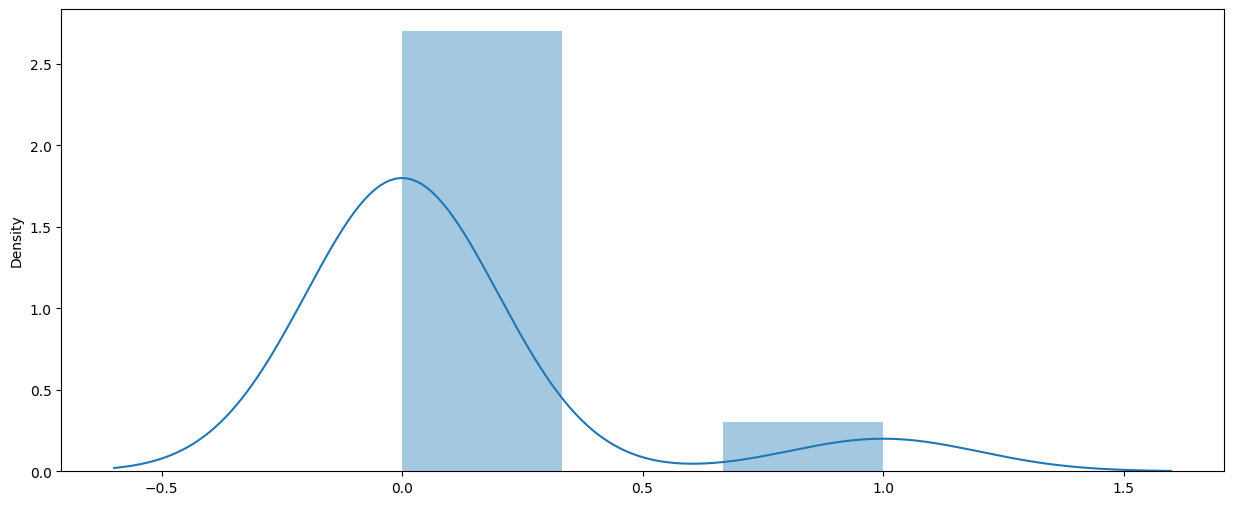



Bernoulli(probs: 0.4000000059604645)
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]


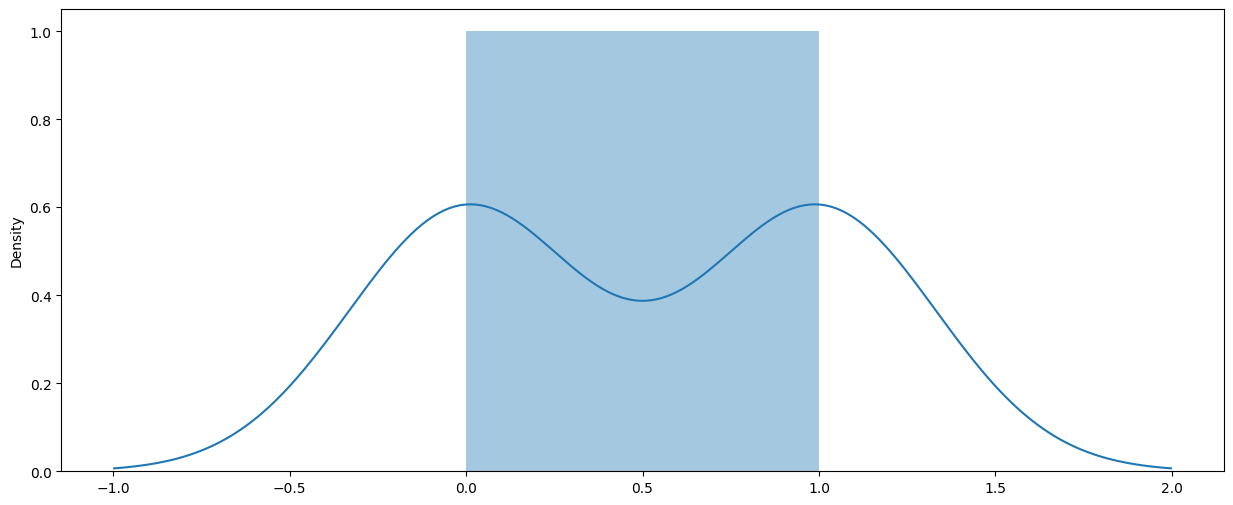



Poisson(rate: 0.6000000238418579)
[2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0]


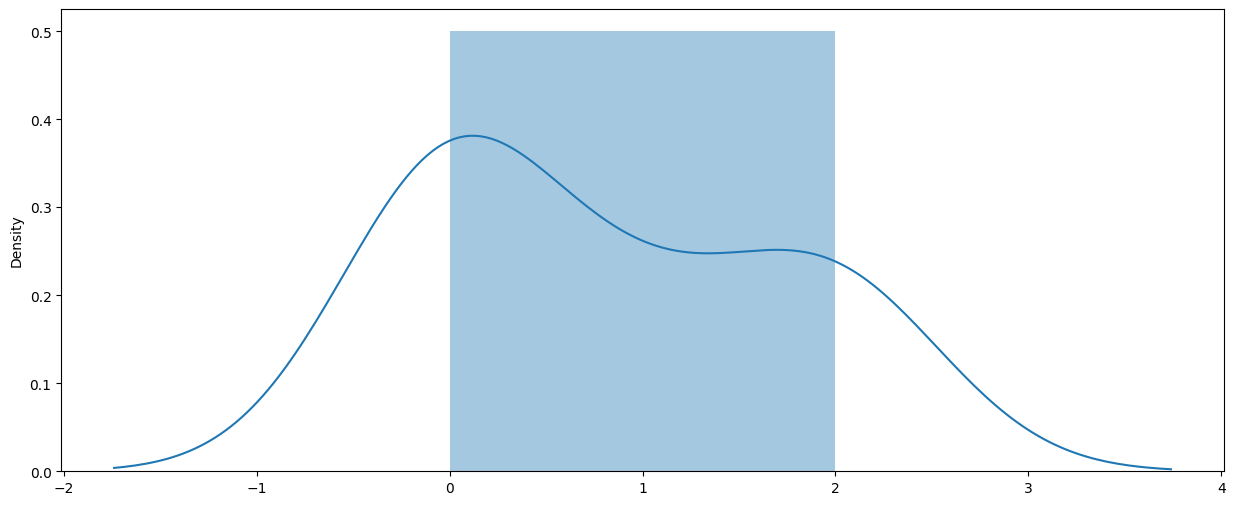

In [ ]:
distributions = [
           distrib.Normal(loc=0.5, scale=1),#gaussian distribution
           distrib.Laplace(loc=0.9, scale=0.1),
           distrib.Binomial(probs=0.3),
           distrib.Bernoulli(probs=0.4),
           distrib.Poisson(rate=0.6)
           ]
for i in distributions:
    vals = []
    print('\n\n', i, sep='')
    for j in range (10):
        vals.append(pyro.sample("sample_name", i).item())
    print(vals)
    plt.figure(figsize=(15,6))
    #plt.grid()
    sns.distplot(vals)
    plt.show()

In [ ]:
def weather():
    cloudy = pyro.sample("cloudy", distrib.Bernoulli(probs=torch.rand(1)))#0 or 1
    mean = {"cloudy":30, "sunny":50}
    std = {"cloudy":10.4, "sunny":25.5}

    if(cloudy >0.5):
        actual = "cloudy"
    else:
        actual="sunny"
    temp = pyro.sample("normal distribution", distrib.Normal(mean[actual], std[actual]))
    return actual, temp.item()

In [ ]:
cloudy = []
cloudy_vals = []
sunny = []
sunny_vals = []
for i in range(10):
    temp = weather()
    if(temp[0]=='cloudy'):
        cloudy.append(temp)
        cloudy_vals.append(temp[1])
    else:
        sunny.append(temp)
        sunny_vals.append(temp[1])
print(cloudy)
print(sunny)

[('cloudy', 17.923206329345703), ('cloudy', 34.46410369873047), ('cloudy', 28.84870147705078), ('cloudy', 35.19028091430664), ('cloudy', 33.39271926879883), ('cloudy', 20.019020080566406), ('cloudy', 46.824981689453125)]
[('sunny', 24.41489028930664), ('sunny', 88.59725952148438), ('sunny', 37.38941955566406)]


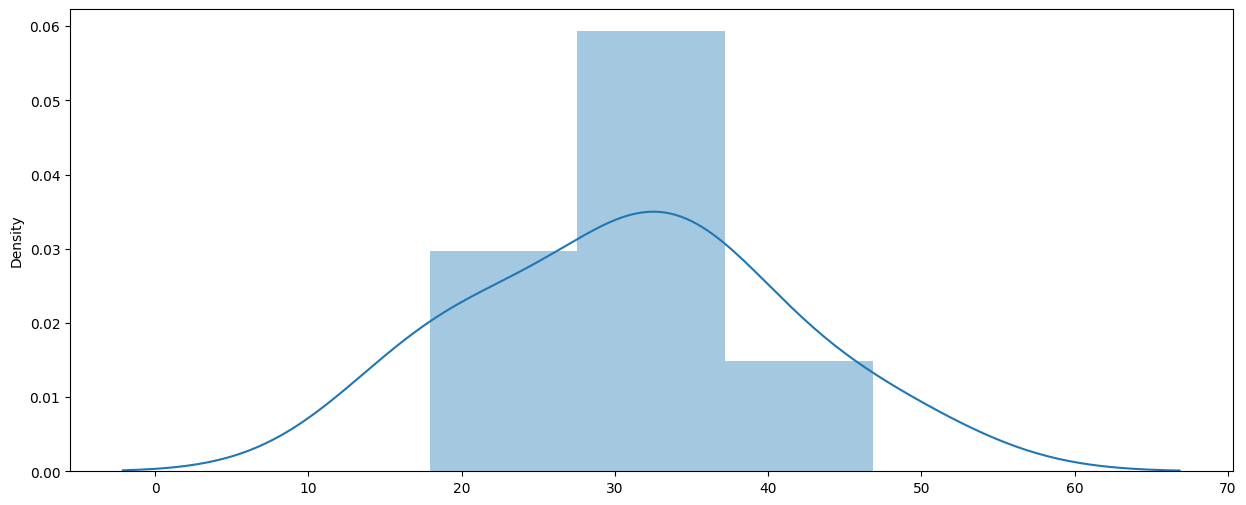

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(cloudy_vals);
plt.show();

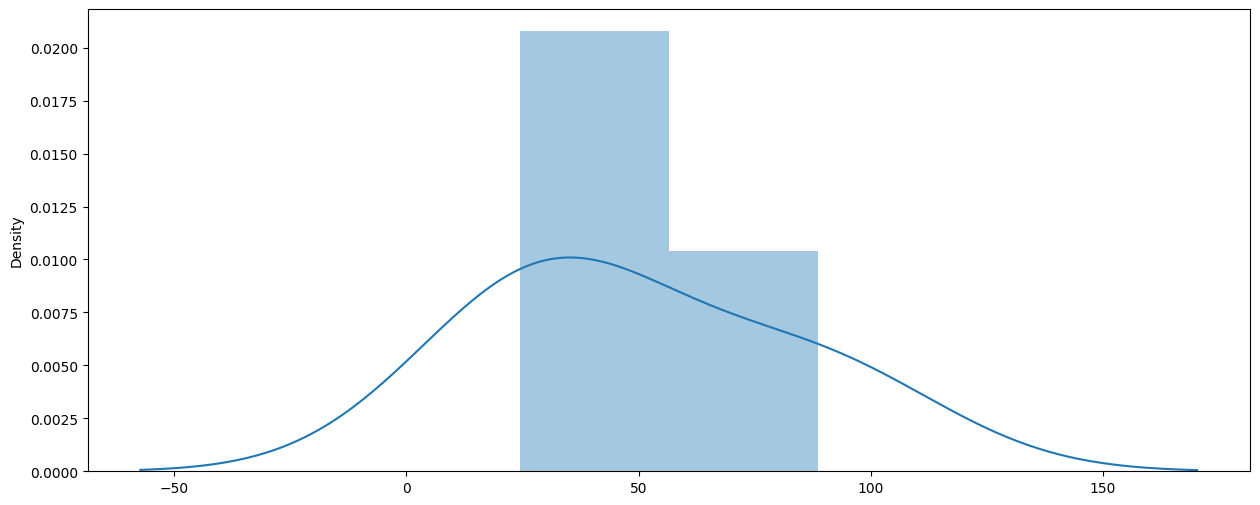

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(sunny_vals);
plt.show();